In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.stats as stats

C:\Users\kesha\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# import the data

train= pd.read_csv('bigmart_train.csv')
test= pd.read_csv('bigmart_test.csv')

In [3]:
train.shape,test.shape

((8523, 12), (5681, 11))

### framework of Model Building

**Exploratory Data Analysis**

    * Univariate Analysis
    * Bivariate Analysis
    * Missing Value Imputation
    * Outlier Analysis and imputation
    * Feature Engineering
    * Statistical Hypothesis Testing
    * Categorical Variable Analysis and Encoding
    * Scaling and Transformation
 
 Note: Post EDA you have entered the pre modelling stage.


**Models**
     
     * Base Models - Average in case of Linear Regression
     * In case of Classification -  Highest Frequency
     * Linear Regression
     * Tree Based Models -  Decision Tree, RandomForest,Gradient Boosting machines,etc
     * Remember that all the models shall be cross Validated Models.
     

In [4]:
# combine the train and test sets


combined= pd.concat([train,test],ignore_index=True)

combined.shape,train.shape,test.shape

((14204, 12), (8523, 12), (5681, 11))

### * Univariate Analysis

* It represents Single Variable Analysis
* Num vars: Distplot,Histogram
* Cat vars: Countplot


In [5]:
# Lets pull the list of numerical Variables...

nums= combined.select_dtypes(include= np.number).columns
cats= combined.select_dtypes(exclude= np.number).columns

In [6]:
cats

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

<Figure size 1500x1000 with 0 Axes>

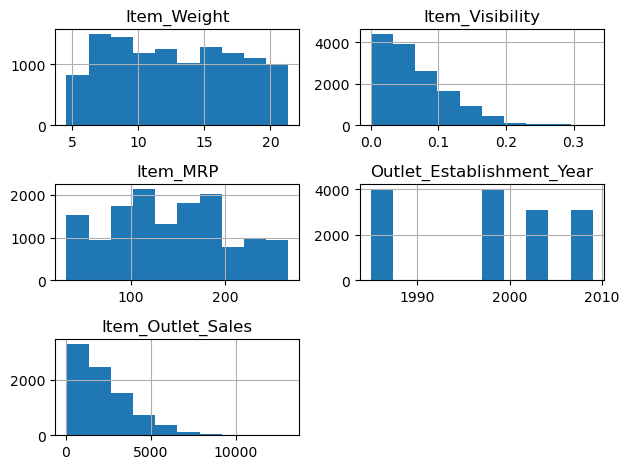

In [7]:
plt.figure(figsize=(15,10))
combined.loc[:,nums].hist()
plt.tight_layout()
plt.show()

<Axes: xlabel='Item_MRP', ylabel='Density'>

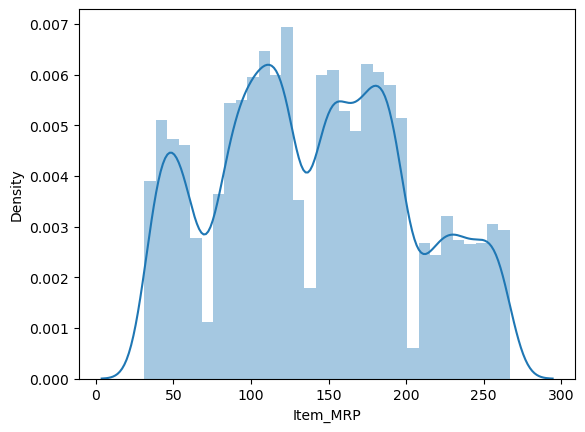

In [8]:
sns.distplot(combined.Item_MRP)

Above given data distribution is multimodal, it have multiple modes

In [9]:
combined.loc[:,nums].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


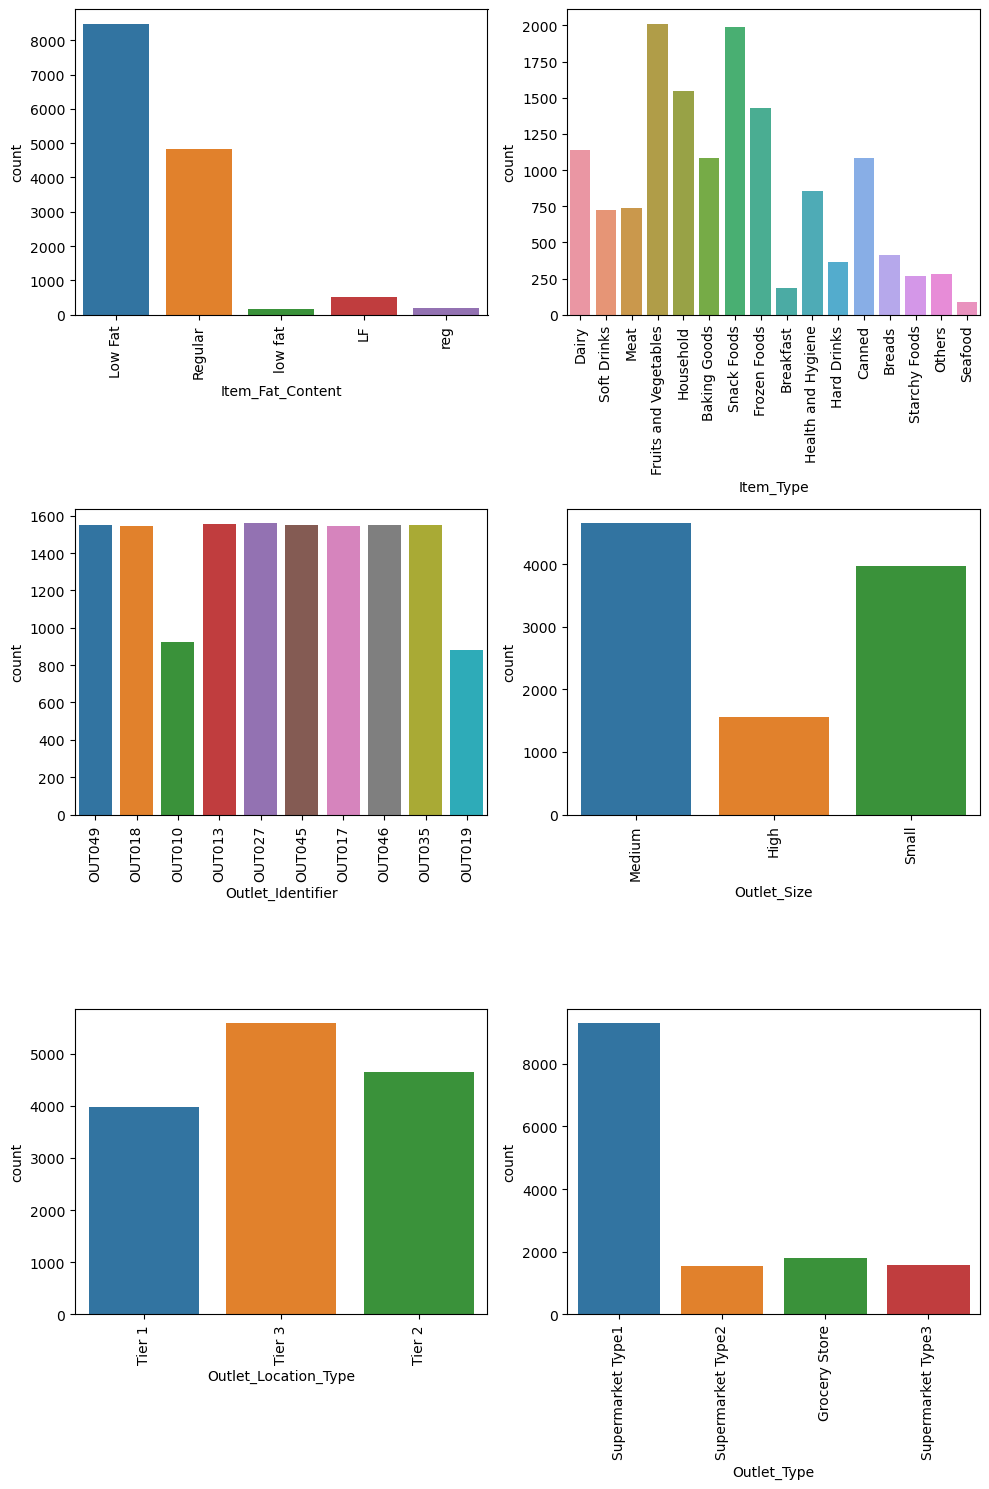

In [10]:
#cats

cat_cols=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

nrows=3
ncols=2
iterator=1
plt.figure(figsize=(10,15))
for i in cat_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.countplot(data=combined,x=i) #we can wlso use combined[i] as data
    plt.xticks(rotation=90)
    iterator+=1
    
plt.tight_layout()
plt.show()

In [11]:
combined.Outlet_Identifier.value_counts(ascending=False)

Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: count, dtype: int64

### * Bivariate Analysis

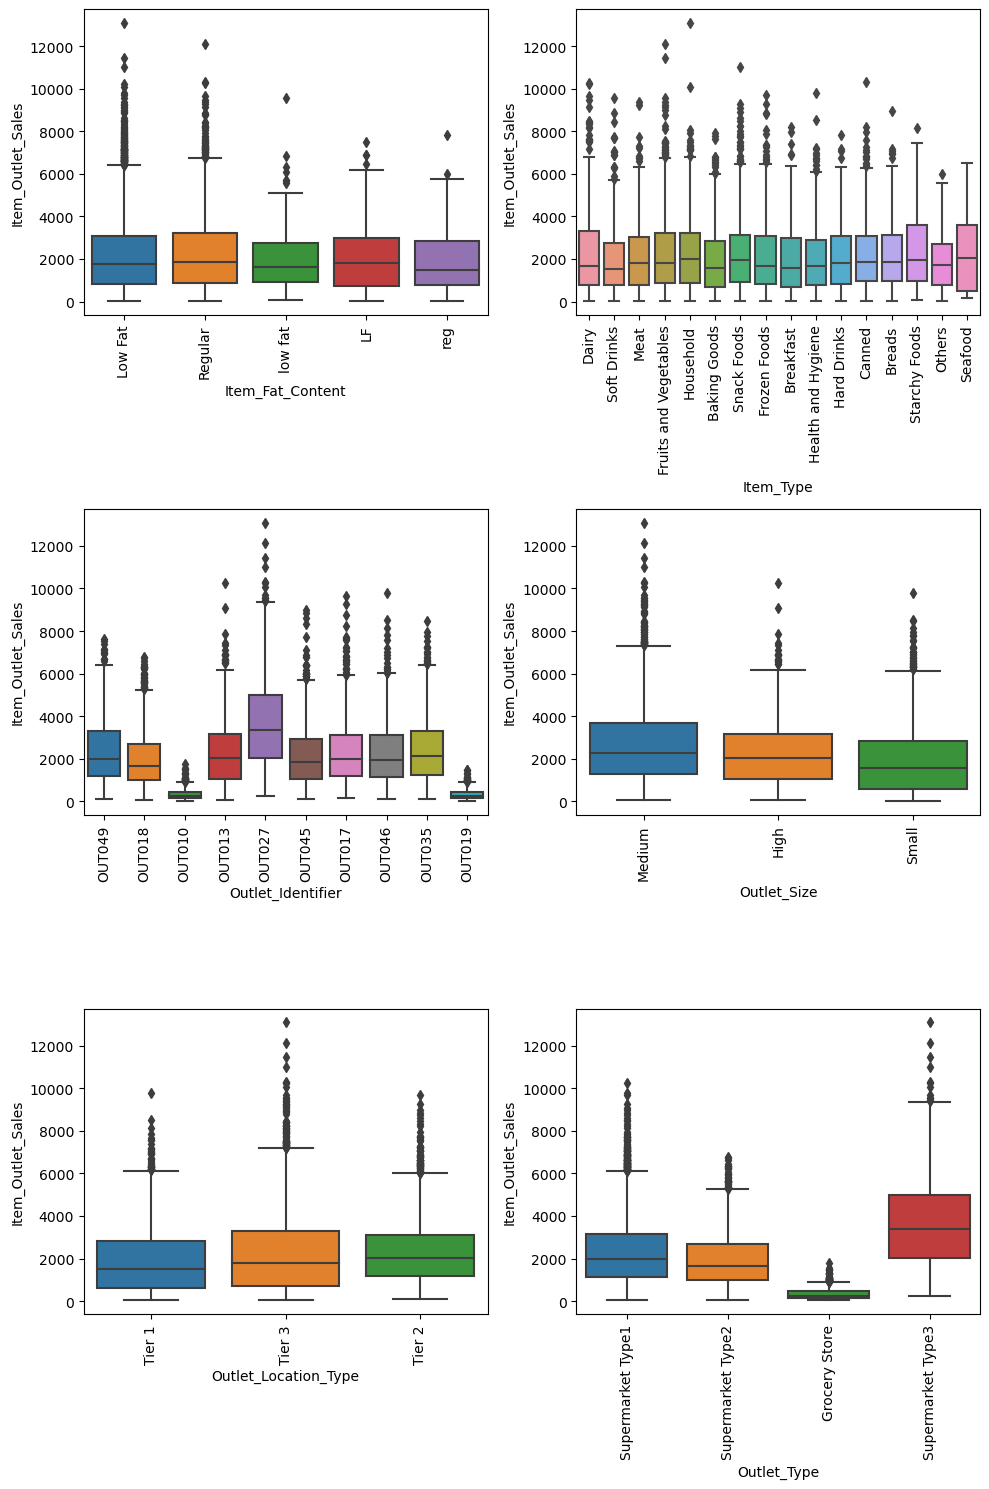

In [12]:
#cats vs num

cat_cols=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

nrows=3
ncols=2
iterator=1
plt.figure(figsize=(10,15))
for i in cat_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.boxplot(x=combined[i],y=combined.Item_Outlet_Sales) #we can wlso use combined[i] as data
    plt.xticks(rotation=90)
    iterator+=1
    
plt.tight_layout()
plt.show()

In [13]:
combined.Item_Fat_Content.replace(('LF','low fat'),'Low Fat',inplace=True)
combined.Item_Fat_Content.replace(('reg'),'Regular',inplace=True)

In [14]:
combined.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)


combined.Item_Fat_Content.replace(to_replace = ['low fat', 'LF', 'reg'],
                                 value = ['Low Fat',
                                         'Low Fat', 'Regular'], 
                                  inplace = True)

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

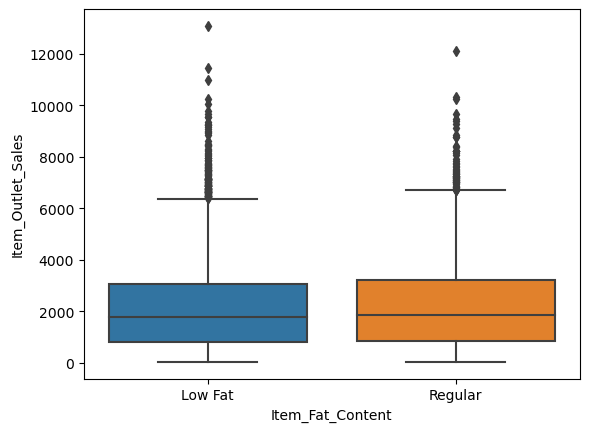

In [15]:
# Fat vs Sales

sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=combined)

In [16]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

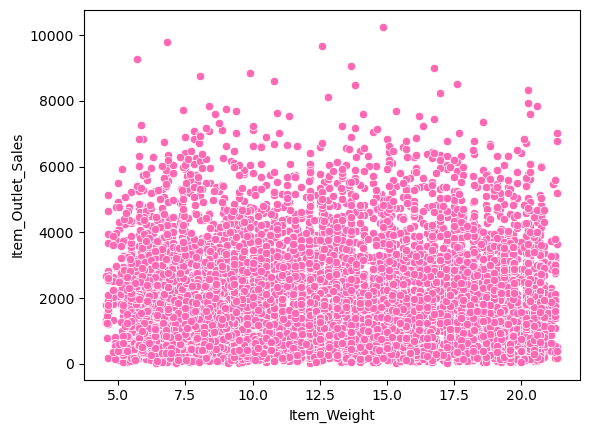

In [17]:
# Item weight VS Sales

sns.scatterplot(x = "Item_Weight", y = "Item_Outlet_Sales",data = combined, color = "hotpink")
plt.show()

In [18]:
# pull a Dataframe head where Item weight is missing

combined.loc[combined.Item_Weight.isnull(),:].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


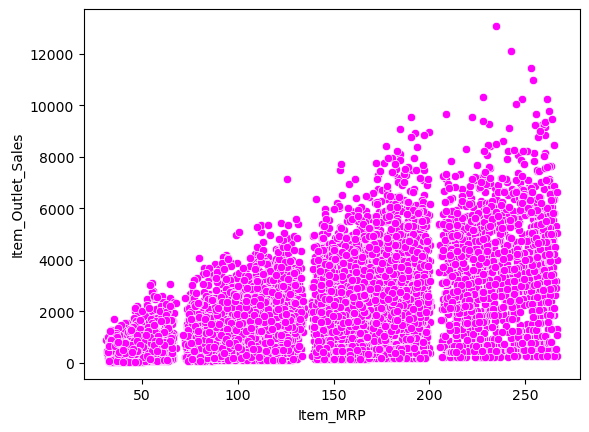

In [19]:
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=combined,color='magenta')
plt.show()

# Conclusion:
#Since we know that the Mrp is combined and thus, we see a combined effwct with sales

# we can understsnd that tha MRP is multimodal data which leads to multi modal transactions combined together
# Hence we conclude that there is combinatin effect on MRP Vs Sales

In [20]:
combined.loc[combined.Item_Identifier=='FDP10','Item_Weight']

7         NaN
585      19.0
2623     19.0
3382     19.0
4585     19.0
6087     19.0
7883     19.0
11896    19.0
12371    19.0
13327     NaN
Name: Item_Weight, dtype: float64

In [21]:
#Dictionary

mapped=combined.groupby('Item_Identifier')['Item_Weight'].median().to_dict()

In [22]:
mapped

{'DRA12': 11.6,
 'DRA24': 19.35,
 'DRA59': 8.27,
 'DRB01': 7.39,
 'DRB13': 6.115,
 'DRB24': 8.785,
 'DRB25': 12.3,
 'DRB48': 16.75,
 'DRC01': 5.92,
 'DRC12': 17.85,
 'DRC13': 8.26,
 'DRC24': 17.85,
 'DRC25': 5.73,
 'DRC27': 13.8,
 'DRC36': 13.0,
 'DRC49': 8.67,
 'DRD01': 12.1,
 'DRD12': 6.96,
 'DRD13': 15.0,
 'DRD15': 10.6,
 'DRD24': 13.85,
 'DRD25': 6.135,
 'DRD27': 18.75,
 'DRD37': 9.8,
 'DRD49': 9.895,
 'DRD60': 15.7,
 'DRE01': 10.1,
 'DRE03': 19.6,
 'DRE12': 4.59,
 'DRE13': 6.28,
 'DRE15': 13.35,
 'DRE25': 15.35,
 'DRE27': 11.85,
 'DRE37': 13.5,
 'DRE48': 8.43,
 'DRE49': 20.75,
 'DRE60': 9.395,
 'DRF01': 5.655,
 'DRF03': 19.1,
 'DRF13': 12.1,
 'DRF15': 18.35,
 'DRF23': 4.61,
 'DRF25': 9.0,
 'DRF27': 8.93,
 'DRF36': 16.1,
 'DRF37': 17.25,
 'DRF48': 5.73,
 'DRF49': 7.27,
 'DRF51': 15.75,
 'DRF60': 10.8,
 'DRG01': 14.8,
 'DRG03': 14.5,
 'DRG11': 6.385,
 'DRG13': 17.25,
 'DRG15': 6.13,
 'DRG23': 8.88,
 'DRG25': 10.5,
 'DRG27': 8.895,
 'DRG36': 14.15,
 'DRG37': 16.2,
 'DRG39': 14.15,
 '

In [23]:
# impute the missing values
#combined.Item_Weight=combined.Item_Weight.map(mapped)
#combined['Item_Weight']=combined.groupby('Item_Identifier')['Item_Weight'].apply(lambda x: x.fillna(x.mean()))

In [24]:
combined.Item_Weight.isna().sum()

2439

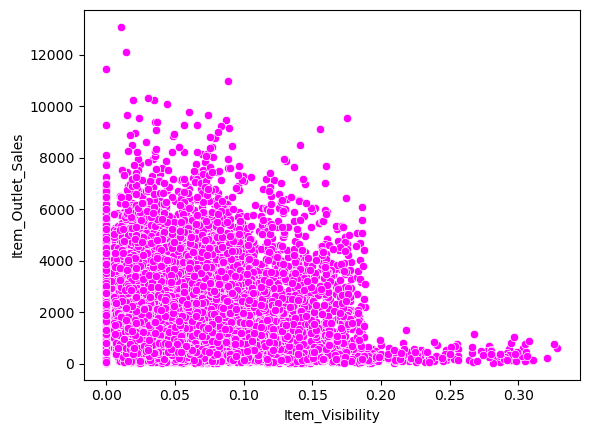

In [25]:
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=combined,color='magenta')
plt.show()

In [26]:
# Impute the Missing Values
combined.Item_Visibility=combined.groupby("Item_Identifier")["Item_Visibility"].apply(lambda x:x.replace(to_replace = 0,value = x.mean()))

In [27]:
combined.loc[combined.Outlet_Size.isnull(),'Outlet_Type'].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [28]:
combined.groupby(["Outlet_Identifier", "Outlet_Type"])["Outlet_Size"].value_counts()

Outlet_Identifier  Outlet_Type        Outlet_Size
OUT013             Supermarket Type1  High           1553
OUT018             Supermarket Type2  Medium         1546
OUT019             Grocery Store      Small           880
OUT027             Supermarket Type3  Medium         1559
OUT035             Supermarket Type1  Small          1550
OUT046             Supermarket Type1  Small          1550
OUT049             Supermarket Type1  Medium         1550
Name: count, dtype: int64

In [29]:
combined.loc[combined.Outlet_Size.isnull(),'Outlet_Size']='Small'

### Feature Engineering

1. Item Identifier

In [30]:
combined.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
ids=[]
for i in combined.Item_Identifier:
    ids.append(i[:2])

In [32]:
combined['Item_IDS']= pd.Series(ids)

In [33]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [34]:
perish = ['Dairy','Meat', 'Fruits and Vegetables',
         'Breakfast''Breads', 'Starchy Foods','Seafood']

In [35]:
def badaldo(x):
    if x in perish:
        return("Perishables")
    else:
        return("Non_Perishables")

In [36]:
combined["Item_Type_Cat"] = combined.Item_Type.apply(badaldo)

<Axes: xlabel='Item_Type_Cat', ylabel='Item_Outlet_Sales'>

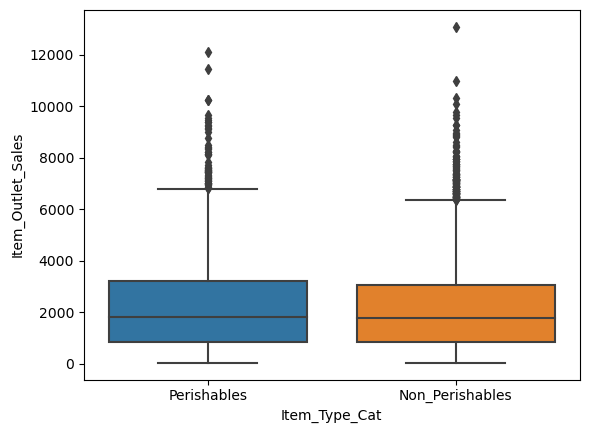

In [37]:
# Patterns between Item Type cat  vs sales


sns.boxplot(x = "Item_Type_Cat", y  ="Item_Outlet_Sales",
           data = combined)


In [38]:
combined.loc[combined.Item_IDS=='NC','Item_Fat_Content']='Non_Edible'

In [39]:
# Outlets.
top= ['OUT027','OUT013']
worst= ['OUT010','OUT019']

def outlets(x):
    if x in top:
        return('Best')
    elif x in worst:
        return('Worst')
    else:
        return('Good')

In [40]:
combined['Outlets']= combined.Outlet_Identifier.apply(outlets)

<Axes: xlabel='Outlets', ylabel='Item_Outlet_Sales'>

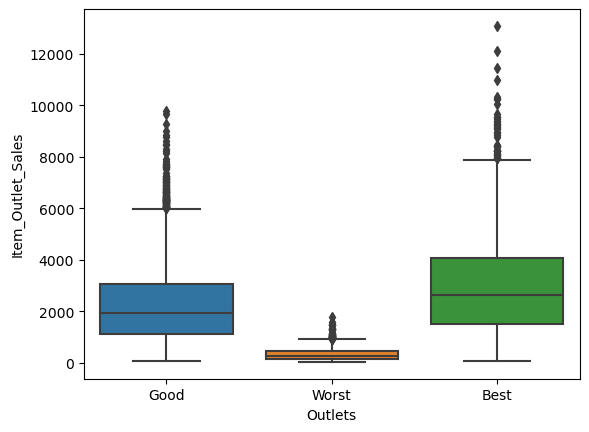

In [41]:
sns.boxplot(x='Outlets',y='Item_Outlet_Sales',data=combined)

In [42]:
# drop the unnecessary columns now

combined.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [43]:
combined.shape

(14204, 11)

In [44]:
# Outlet Size

mapped_size = {"Medium":3, "High":2, "Small":1}
mapped_outlet = {"Best":3, "Good":2, "Worst":1}
mapped_loc = {"Tier 3":3, "Tier 1":2, "Tier 2":1}

#combined.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].describe()

In [45]:
combined.Outlet_Size=combined.Outlet_Size.map(mapped_size)
combined.Outlets=combined.Outlets.map(mapped_outlet)
combined.Outlet_Location_Type=combined.Outlet_Location_Type.map(mapped_loc)

In [46]:
combined.isna().sum()

Item_Weight             2439
Item_Fat_Content           0
Item_Visibility            0
Item_MRP                   0
Outlet_Size                0
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales       5681
Item_IDS                   0
Item_Type_Cat              0
Outlets                    0
dtype: int64

In [47]:
combined.Item_Weight=combined.Item_Weight.transform(lambda x:x.fillna(x.median()))

In [48]:
combined.isna().sum()

Item_Weight                0
Item_Fat_Content           0
Item_Visibility            0
Item_MRP                   0
Outlet_Size                0
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales       5681
Item_IDS                   0
Item_Type_Cat              0
Outlets                    0
dtype: int64

In [49]:
# one hot encoding

dummy= pd.get_dummies(combined,drop_first=True)

In [50]:
#spliting the data into train and test

newtrain= dummy.loc[0:train.shape[0]-1, ]
newtest= dummy.loc[train.shape[0]:, ]

In [51]:
# drop the target from the test set

newtest.drop('Item_Outlet_Sales',axis=1,inplace=True)

### Model Building


In [52]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

In [53]:
kfold= KFold(n_splits=5,shuffle=True,random_state=0)

x=newtrain.drop('Item_Outlet_Sales',axis=1)
y= newtrain.Item_Outlet_Sales

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

lr=LinearRegression()

predictions=[]
for train_index,test_index in kfold.split(x,y):
    xtrain= x.iloc[train_index]
    ytrain= y.iloc[train_index]
    validn_xtest= x.iloc[test_index]
    validn_ytest= y.iloc[test_index]
    
  

In [54]:
  # model
pred= lr.fit(xtrain,ytrain).predict(newtest)
predictions.append(pred)

In [55]:
# Submission File

submission = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
             "Outlet_Identifier": test.Outlet_Identifier, 
             "Item_Outlet_Sales": np.abs(predictions)[0]})

In [56]:
# export it as csv

submission.to_csv('sbmsn.csv',index=False)

In [61]:
from sklearn.metrics import mean_squared_error